# Best Fast Food Place with Calories in Consideration

# The goal here:
- trying to find the healthier fast food options that would be a great dinner option for those who are tired after work and want a meal that will fit within the standard 2,000 calorie limit (generalized calorie amount, calorie needs will vary between every individual)
- considering the following macros: carbs, fats, and protein. The macros division can be split up in varying ways, but I will keep the standard 50% carbs, 30% protein, and 20% fat. I would also want to emphasize sodium and fiber. The recommended amount of sodium is 2,300 mg a day, and the average amount of fiber for female and male is 21 to 30 (lower scale). 
- Ideally, if you had a balanced breakfast, lunch, and maybe a few snacks, the calorie range for dinner would be around 500-600 calories. 1 gram of carb is 4 calories, 1 gram of protein is 4 calories, and 1 gram of fat is 9 calories. Taking that into consideration, the distribution of 600 calories for the macros would be 75 grams of carbs, 45 gram of protein, and 13 grams of fat.

In [2]:
# Setting up
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Connect to resource file
fast_food_path = "resources/fastfood.csv"

# Read file shown above
fast_food_data = pd.read_csv(fast_food_path)

# Display data
fast_food_data.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


# Copy Dataset and Cleaning

In [3]:
# Make copy of dataset with selected columns
fast_food_copy = fast_food_data.copy(deep=True)


# Find all the unique restaurants in the dataset
fast_food_unique = fast_food_copy["restaurant"].unique()

# Find the total number of fast food restaurants
restaurant_total = len(fast_food_unique)

# Cleaning dataset, deleting columns that are not needed
fast_food_copy = fast_food_copy.drop(columns=['cal_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'vit_a', 'vit_c', 'calcium', 'salad'])
fast_food_copy

# Finding all the column names to reorganize
fast_food_copy.columns
organized_copy = fast_food_copy[[
    'restaurant', 'item', 'calories', 'total_carb', 'protein', 'total_fat', 'sodium', 'fiber', 'sugar'
]]
organized_copy

# Renaming all the column names for clarity 
organized_copy = organized_copy.rename(columns={
    'restaurant' : 'Fast Food Restaurant',
    'item' : 'Food Item',
    'calories' : 'Calories',
    'total_carb' : 'Total Carbs (g)',
    'protein' : 'Protein (g)',
    'total_fat' : 'Total Fats (g)',
    'sodium' : 'Sodium (mg)',
    'fiber' : 'Fiber (g)',
    'sugar' : 'Added Sugar (g)'
})

# Display clean dataset
organized_copy.head()

,Fast Food Restaurant,Food Item,Calories,Total Carbs (g),Protein (g),Total Fats (g),Sodium (mg),Fiber (g),Added Sugar (g)
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,44,37.0,7,1110,3.0,11
1,Mcdonalds,Single Bacon Smokehouse Burger,840,62,46.0,45,1580,2.0,18
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,63,70.0,67,1920,3.0,18
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,62,55.0,31,1940,2.0,18
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,81,46.0,45,1980,4.0,18


# Finding Average Macros for Each Restaurant

In [4]:
# Finding the average calorie, carb, protein, fat, sodium, and fiber for the entire dataset 
overall_cal_average = round(organized_copy['Calories'].mean())
overall_carb_average = round(organized_copy['Total Carbs (g)'].mean())
overall_protein_average = round(organized_copy['Protein (g)'].mean())
overall_fat_average = round(organized_copy['Total Fats (g)'].mean())
overall_sodium_average = round(organized_copy['Sodium (mg)'].mean())
overall_fiber_average = round(organized_copy['Fiber (g)'].mean())

# Create dataframe to showcase averages of macros 
average_macros = pd.DataFrame({
    'Total Fast Food Restaurants' : [restaurant_total],
    'Average Calories' : [overall_cal_average],
    'Average Total Carbs (g)' : [overall_carb_average],
    'Average Protein (g)' : [overall_protein_average],
    'Average Total Fats (g)' : [overall_fat_average],
    'Average Sodium (mg)' : [overall_sodium_average],
    'Average Fiber (g)' : [overall_fiber_average]
})

# Display dataframe
average_macros

,Total Fast Food Restaurants,Average Calories,Average Total Carbs (g),Average Protein (g),Average Total Fats (g),Average Sodium (mg),Average Fiber (g)
0,8,531,46,28,27,1247,4


In [5]:
# Find the average calorie, carb, protein, fat, sodium, and fiber amount for each fast food restaurant
calorie_average = round(organized_copy.groupby(['Fast Food Restaurant']).mean()['Calories'])
carb_average = round(organized_copy.groupby(['Fast Food Restaurant']).mean()['Total Carbs (g)'])
protein_average = round(organized_copy.groupby(['Fast Food Restaurant']).mean()['Protein (g)'])
fat_average = round(organized_copy.groupby(['Fast Food Restaurant']).mean()['Total Fats (g)'])
sodium_average = round(organized_copy.groupby(['Fast Food Restaurant']).mean()['Sodium (mg)'])
fiber_average = round(organized_copy.groupby(['Fast Food Restaurant']).mean()['Fiber (g)'])

# Create a dataframe to hold averages for each restaurant
each_restaurant = pd.DataFrame({
    'Average Calories' : calorie_average,
    'Average Total Carbs (g)' : carb_average,
    'Average Protein (g)' : protein_average,
    'Average Total Fats (g)' : fat_average,
    'Average Sodium (mg)' : sodium_average,
    'Average Fiber (g)' : fiber_average
})

# Display dataframe
each_restaurant

C:\Users\annie\AppData\Local\Temp\ipykernel_23312\2437828933.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  calorie_average = round(organized_copy.groupby(['Fast Food Restaurant']).mean()['Calories'])
C:\Users\annie\AppData\Local\Temp\ipykernel_23312\2437828933.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  carb_average = round(organized_copy.groupby(['Fast Food Restaurant']).mean()['Total Carbs (g)'])
C:\Users\annie\AppData\Local\Temp\ipykernel_23312\2437828933.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will def

,Average Calories,Average Total Carbs (g),Average Protein (g),Average Total Fats (g),Average Sodium (mg),Average Fiber (g)
Fast Food Restaurant,,,,,,
Arbys,533.0,45.0,29.0,27.0,1515.0,3.0
Burger King,609.0,39.0,30.0,37.0,1224.0,2.0
Chick Fil-A,384.0,29.0,32.0,16.0,1151.0,2.0
Dairy Queen,520.0,39.0,25.0,29.0,1182.0,3.0
Mcdonalds,640.0,49.0,40.0,32.0,1438.0,3.0
Sonic,632.0,47.0,29.0,38.0,1351.0,3.0
Subway,503.0,55.0,30.0,18.0,1273.0,7.0
Taco Bell,444.0,47.0,17.0,21.0,1014.0,6.0


# Finding % of items under 600 calories per Restaurant

In [6]:
# Finding the percentage of menu items that are under 600 calories from each restaurant
# Starting off with Arbys
arby = organized_copy[(organized_copy['Fast Food Restaurant'] == 'Arbys')]
arby_calories = arby[(organized_copy['Calories'] <= 600)]

# Next up: Burger King
burger_king = organized_copy[(organized_copy['Fast Food Restaurant'] == 'Burger King')]
burger_king_calories = burger_king[(organized_copy['Calories'] <= 600)]

# Next up: Chick Fil-A
chickfila = organized_copy[(organized_copy['Fast Food Restaurant'] == 'Chick Fil-A')]
chickfila_calories = chickfila[(organized_copy['Calories'] <= 600)]

# Next up: Dairy Queen
dairy_queen = organized_copy[(organized_copy['Fast Food Restaurant'] == 'Dairy Queen')]
dairy_queen_calories = dairy_queen[(organized_copy['Calories'] <= 600)]

# Next up: Mcdonalds
mcdonalds = organized_copy[(organized_copy['Fast Food Restaurant'] == 'Mcdonalds')]
mcdonalds_calories = mcdonalds[(organized_copy['Calories'] <= 600)]

# Next up: Sonic
sonic = organized_copy[(organized_copy['Fast Food Restaurant'] == 'Sonic')]
sonic_calories = sonic[(organized_copy['Calories'] <= 600)]

# Next up: Subway 
subway = organized_copy[(organized_copy['Fast Food Restaurant'] == 'Subway')]
subway_calories = subway[(organized_copy['Calories'] <= 600)]

# Finally: Taco Bell
taco_bell = organized_copy[(organized_copy['Fast Food Restaurant'] == 'Taco Bell')]
taco_bell_calories = taco_bell[(organized_copy['Calories'] <= 600)]

# Calculating all the percentages for each fast food restaurant
arby_percent = round(len(arby_calories) / len(arby) * 100)
burger_king_percent = round(len(burger_king_calories) / len(burger_king) * 100)
chickfila_percent = round(len(chickfila_calories) / len(chickfila) * 100)
dairy_queen_percent = round(len(dairy_queen_calories) / len(dairy_queen) * 100)
mcdonalds_percent = round(len(mcdonalds_calories) / len(mcdonalds) * 100)
sonic_percent = round(len(sonic_calories) / len(sonic) * 100)
subway_percent = round(len(subway_calories) / len(subway) * 100)
taco_bell_percent = round(len(taco_bell_calories) / len(taco_bell) * 100)

# Creating a dataframe to store the percentages
fast_food_percent = pd.DataFrame({
    'Fast Food Restaurant' : 'Menu Items under 600 Calories',
    'Arbys' : [arby_percent],
    'Burger King' : [burger_king_percent],
    'Chick Fil-A' : [chickfila_percent],
    'Dairy Queen' : [dairy_queen_percent],
    'Mcdonalds' : [mcdonalds_percent],
    'Sonic' : [sonic_percent],
    'Subway' : [subway_percent],
    'Taco Bell' : [taco_bell_percent]
})

# Formatting
fast_food_percent['Arbys'] = fast_food_percent['Arbys'].map("{}%".format)
fast_food_percent['Burger King'] = fast_food_percent['Burger King'].map("{}%".format)
fast_food_percent['Chick Fil-A'] = fast_food_percent['Chick Fil-A'].map("{}%".format)
fast_food_percent['Dairy Queen'] = fast_food_percent['Dairy Queen'].map("{}%".format)
fast_food_percent['Mcdonalds'] = fast_food_percent['Mcdonalds'].map("{}%".format)
fast_food_percent['Sonic'] = fast_food_percent['Sonic'].map("{}%".format)
fast_food_percent['Subway'] = fast_food_percent['Subway'].map("{}%".format)
fast_food_percent['Taco Bell'] = fast_food_percent['Taco Bell'].map("{}%".format)

# Displaying DataFrame
fast_food_percent

C:\Users\annie\AppData\Local\Temp\ipykernel_23312\3716670308.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arby_calories = arby[(organized_copy['Calories'] <= 600)]
C:\Users\annie\AppData\Local\Temp\ipykernel_23312\3716670308.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  burger_king_calories = burger_king[(organized_copy['Calories'] <= 600)]
C:\Users\annie\AppData\Local\Temp\ipykernel_23312\3716670308.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chickfila_calories = chickfila[(organized_copy['Calories'] <= 600)]
C:\Users\annie\AppData\Local\Temp\ipykernel_23312\3716670308.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dairy_queen_calories = dairy_queen[(organized_copy['Calories'] <= 600)]
C:\Users\annie\AppData\Local\Temp\ipykernel_23312\3716670308.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mc

,Fast Food Restaurant,Arbys,Burger King,Chick Fil-A,Dairy Queen,Mcdonalds,Sonic,Subway,Taco Bell
0,Menu Items under 600 Calories,56%,57%,89%,71%,58%,53%,66%,79%


# Creating a Bar Plot to see # of items under 600 calories

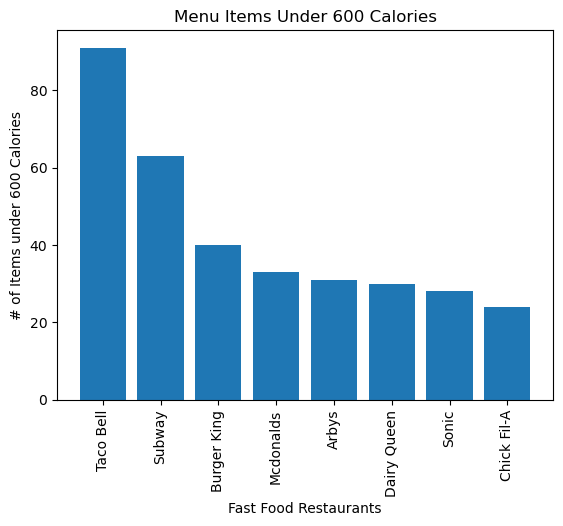

In [35]:
# Create a bar plot using pyplot to showcase how many items a fast food restaurant has that is under 600 calories
under_calories = organized_copy[(organized_copy['Calories'] <= 600 )]
restaurant_count = under_calories['Fast Food Restaurant'].value_counts()
plt.bar(restaurant_count.index.values, restaurant_count.values)
plt.xlabel('Fast Food Restaurants')
plt.xticks(rotation=90)
plt.ylabel('# of Items under 600 Calories')
plt.title('Menu Items Under 600 Calories')
plt.show()

# Box Plot for Calories

In [36]:
# Creating a for loop to make a bar plot
fast_food_places = ['Taco Bell', 'Subway', 'Dairy Queen', 'Chick Fil-A']

# Create an empty list to hold data
calorie_list = []

# creating for loop
for place in fast_food_places:
    calorie = organized_copy.loc[organized_copy['Fast Food Restaurant'] == place, 'Calories']
    calorie_list.append(calorie)
    quartiles = calorie.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    outliers = calorie.loc[(calorie < lower_bound) | (calorie > upper_bound)]
    print(f"{place}'s potential outliers: {outliers}'")
    

Taco Bell's potential outliers: Series([], Name: Calories, dtype: int64)'
Subway's potential outliers: Series([], Name: Calories, dtype: int64)'
Dairy Queen's potential outliers: 270    1260
Name: Calories, dtype: int64'
Chick Fil-A's potential outliers: 69    970
Name: Calories, dtype: int64'


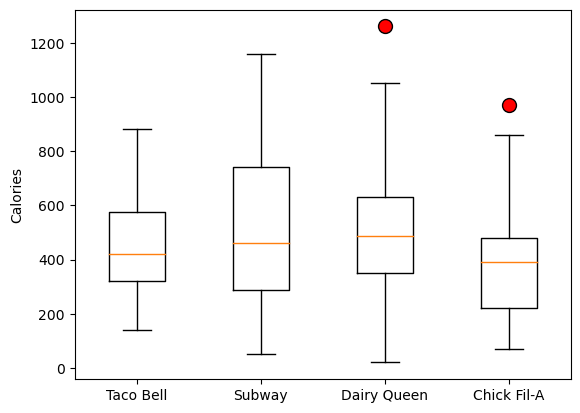

In [40]:
# Creating a box plot to show the distribution of calories for number of items
mark_out = dict(markerfacecolor='red', markersize=10)
plt.boxplot(calorie_list, labels=fast_food_places, flierprops=mark_out)
plt.ylabel('Calories')
plt.show()